In [5]:
#small dataset
import numpy as np  
import pandas as pd

usptodata = pd.read_csv('U.S. Patents.csv')
usptodataset=usptodata[["grant_id","claims_text","abstract"]]
usptodataset= usptodata.dropna()
US_Patent_df = usptodataset.reset_index(drop=True)
US_Patent_df= US_Patent_df[['grant_id','abstract']]
US_Patent_df

,grant_id,abstract
0,USPP030977,"A new and distinct variety of Mango plant, her..."
1,USPP030978,&#x2018;Honeysuckle Rose #1-6&#x2019; is a new...
2,USPP030979,"A new and distinct peach tree variety, <i>Prun..."
3,USPP030980,This invention relates to a new and distinct v...
4,USPP030981,A new and distinct cultivar of Strawberry plan...
...,...,...
7008,US10462947,Provided are a first component holding tool op...
7009,US10462948,In a case in which mounting deviation is occur...
7010,US10462949,A reel holding device is provided. The device ...
7011,US10462950,An electronic component bonding device include...


In [6]:
def cleantext(df): 
    
    US_Patent_df['cleaned_text'] = US_Patent_df['abstract'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    
    # convert to lowercase
    US_Patent_df['cleaned_text'] = US_Patent_df['cleaned_text'].str.lower()
    
    #remove numbers
    US_Patent_df['cleaned_text'] =US_Patent_df['cleaned_text'].replace(r'\d+', '', regex = True)
        
    #remove_symbols
    US_Patent_df['cleaned_text']  = US_Patent_df['cleaned_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    #remove punctuations 
    US_Patent_df['cleaned_text'] = US_Patent_df['cleaned_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)
    
    #remove_URL(x):
    US_Patent_df['cleaned_text']  = US_Patent_df['cleaned_text'].replace(r'https.*$', "", regex = True)
    US_Patent_df['cleaned_text'] = US_Patent_df['cleaned_text'].replace("   ", " ", regex = True)
    US_Patent_df['cleaned_text'] = US_Patent_df['cleaned_text'].replace("  ", " ", regex = True)
   
    return US_Patent_df

df = cleantext(US_Patent_df)

In [7]:
#remove stopwords and words_to_remove
import nltk
stopwords = nltk.corpus.stopwords.words('english')
df['cleaned_text_without_Stopwprd'] = df['cleaned_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stopwords]))
df

,grant_id,abstract,cleaned_text,cleaned_text_without_Stopwprd
0,USPP030977,"A new and distinct variety of Mango plant, her...",a new and distinct variety of mango plant here...,new distinct variety mango plant herein referr...
1,USPP030978,&#x2018;Honeysuckle Rose #1-6&#x2019; is a new...,x honeysuckle rose x is a new variety derived...,x honeysuckle rose x new variety derived x sim...
2,USPP030979,"A new and distinct peach tree variety, <i>Prun...",a new and distinct peach tree variety i prunus...,new distinct peach tree variety prunus persica...
3,USPP030980,This invention relates to a new and distinct v...,this invention relates to a new and distinct v...,invention relates new distinct variety red ras...
4,USPP030981,A new and distinct cultivar of Strawberry plan...,a new and distinct cultivar of strawberry plan...,new distinct cultivar strawberry plant named x...
...,...,...,...,...
7008,US10462947,Provided are a first component holding tool op...,provided are a first component holding tool op...,provided first component holding tool operatin...
7009,US10462948,In a case in which mounting deviation is occur...,in a case in which mounting deviation is occur...,case mounting deviation occurring component mo...
7010,US10462949,A reel holding device is provided. The device ...,a reel holding device is provided the device i...,reel holding device provided device includes c...
7011,US10462950,An electronic component bonding device include...,an electronic component bonding device include...,electronic component bonding device includes m...


In [8]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df["Lemmatization"] = df["cleaned_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))
df

,grant_id,abstract,cleaned_text,cleaned_text_without_Stopwprd,Lemmatization
0,USPP030977,"A new and distinct variety of Mango plant, her...",a new and distinct variety of mango plant here...,new distinct variety mango plant herein referr...,new distinct variety mango plant herein referr...
1,USPP030978,&#x2018;Honeysuckle Rose #1-6&#x2019; is a new...,x honeysuckle rose x is a new variety derived...,x honeysuckle rose x new variety derived x sim...,x honeysuckle rose x new variety derived x sim...
2,USPP030979,"A new and distinct peach tree variety, <i>Prun...",a new and distinct peach tree variety i prunus...,new distinct peach tree variety prunus persica...,new distinct peach tree variety prunus persica...
3,USPP030980,This invention relates to a new and distinct v...,this invention relates to a new and distinct v...,invention relates new distinct variety red ras...,invention relates new distinct variety red ras...
4,USPP030981,A new and distinct cultivar of Strawberry plan...,a new and distinct cultivar of strawberry plan...,new distinct cultivar strawberry plant named x...,new distinct cultivar strawberry plant named x...
...,...,...,...,...,...
7008,US10462947,Provided are a first component holding tool op...,provided are a first component holding tool op...,provided first component holding tool operatin...,provided first component holding tool operatin...
7009,US10462948,In a case in which mounting deviation is occur...,in a case in which mounting deviation is occur...,case mounting deviation occurring component mo...,case mounting deviation occurring component mo...
7010,US10462949,A reel holding device is provided. The device ...,a reel holding device is provided the device i...,reel holding device provided device includes c...,reel holding device provided device includes c...
7011,US10462950,An electronic component bonding device include...,an electronic component bonding device include...,electronic component bonding device includes m...,electronic component bonding device includes m...


In [ ]:
# n_neighbors
from bertopic import BERTopic
import plotly.express as px
# Dimension reduction
from umap import UMAP
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)


# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, embedding_model=sentence_model)

# Run BERTopic model
topics, probabilities = topic_model.fit_transform(df['Lemmatization']) 

topic_model.visualize_topics()

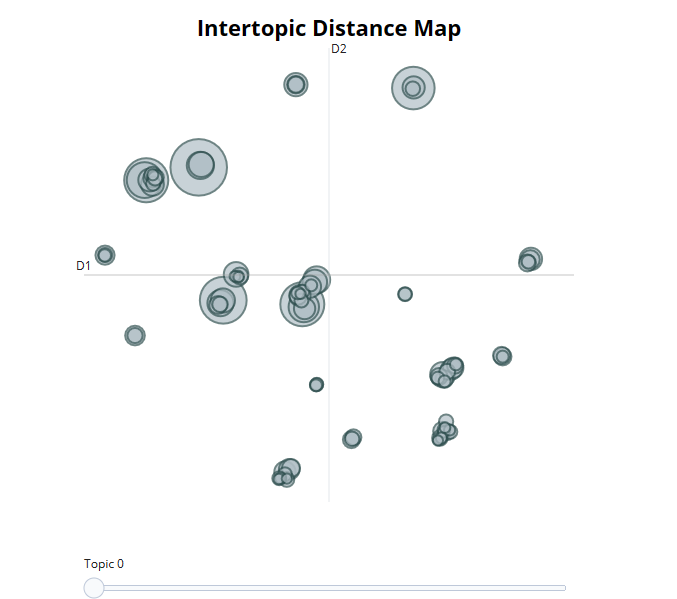

In [24]:
# n_neighbors
from bertopic import BERTopic
import plotly.express as px
# Dimension reduction
from umap import UMAP
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# Initiate UMAP
umap_model = UMAP(n_neighbors=30, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)


# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, embedding_model=sentence_model)

# Run BERTopic model
topics, probabilities = topic_model.fit_transform(df['Lemmatization']) 

topic_model.get_topic_info()

,Topic,Count,Name
0,-1,2830,-1_first_includes_second_device
1,0,785,0_data_user_network_memory
2,1,319,1_composition_acid_invention_protein
3,2,311,2_wireless_communication_station_network
4,3,277,3_semiconductor_layer_substrate_gate
...,...,...,...
70,69,11,69_energy_consumption_power_building
71,70,11,70_processing_plasma_liquid_supply
72,71,10,71_damping_damper_vibration_member
73,72,10,72_capacitor_comparator_da_dr


In [ ]:
#topic_model.visualize_topics()

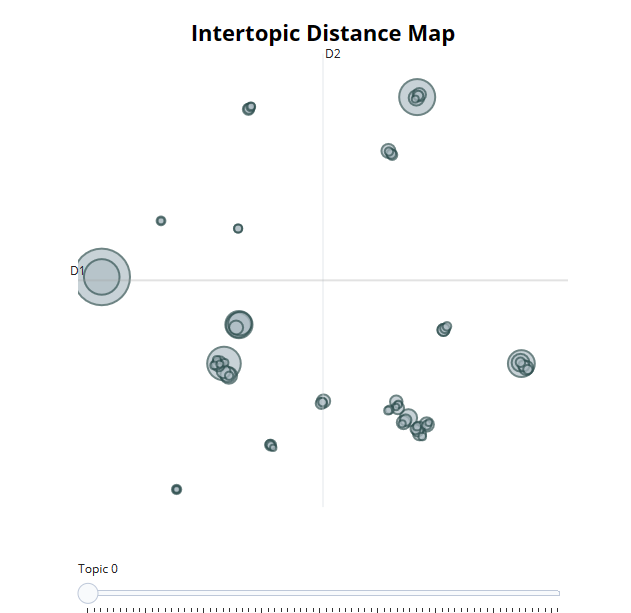

In [22]:
# n_neighbors
from bertopic import BERTopic
import plotly.express as px
# Dimension reduction
from umap import UMAP
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# Initiate UMAP
umap_model = UMAP(n_neighbors=5, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)


# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, embedding_model=sentence_model)

# Run BERTopic model
topics, probabilities = topic_model.fit_transform(df['Lemmatization']) 

topic_model.get_topic_info()

,Topic,Count,Name
0,-1,2149,-1_device_system_one_first
1,0,193,0_wireless_station_communication_network
2,1,157,1_composition_disease_invention_treatment
3,2,130,2_battery_electrode_electrolyte_anode
4,3,124,3_display_pixel_panel_driving
...,...,...,...
138,137,11,137_grip_handle_backing_perforation
139,138,11,138_wrist_watch_hood_garment
140,139,11,139_bolt_firearm_trigger_breech
141,140,10,140_fet_solar_fetshort_powergeneration


In [ ]:
#topic_model.visualize_topics()

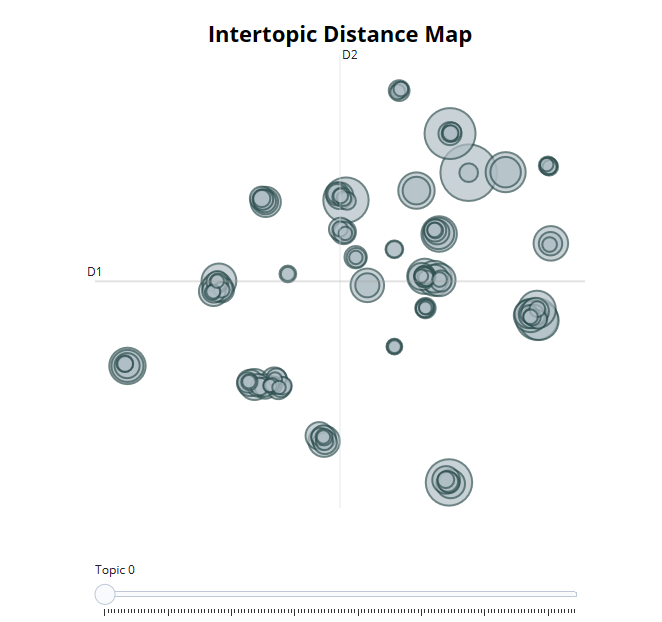

In [20]:
#Umap 
# n_neighbors
from bertopic import BERTopic

# Dimension reduction
from umap import UMAP
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)


# Initiate BERTopic
topic_model_Umap = BERTopic(umap_model=umap_model, embedding_model=sentence_model)

# Run BERTopic model
topics, probabilities = topic_model_Umap.fit_transform(df['Lemmatization']) 

topic_model_Umap.get_topic_info()

,Topic,Count,Name
0,-1,3027,-1_device_system_first_data
1,0,332,0_composition_acid_invention_protein
2,1,227,1_wireless_station_communication_ue
3,2,202,2_image_pixel_imaging_object
4,3,201,3_semiconductor_layer_gate_substrate
...,...,...,...
90,89,12,89_seal_sealing_sealant_lip
91,90,11,90_xray_xrays_detector_tube
92,91,11,91_engine_fuel_ignition_venting
93,92,11,92_battery_balancing_charge_current


In [10]:
#PCA
from bertopic import BERTopic
from sklearn.decomposition import PCA

dim_model = PCA(n_components=5)
topic_model_PCA = BERTopic(umap_model=dim_model)

# Run BERTopic model
topics, probabilities = topic_model_PCA.fit_transform(df['Lemmatization']) 

topic_model_PCA.get_topic_info()

,Topic,Count,Name
0,-1,4654,-1_first_second_device_includes
1,0,2307,0_first_method_one_device
2,1,16,1_sub_layer_xb_substrate
3,2,13,2_first_structure_layer_pad
4,3,12,3_transistor_module_output_puf
5,4,11,4_voltage_current_control_output


In [13]:
# Truncated SVD
from bertopic import BERTopic
from sklearn.decomposition import TruncatedSVD

dim_model = TruncatedSVD(n_components=5)
topic_model_SVD = BERTopic(umap_model=dim_model)

# Run BERTopic model
topics, probabilities = topic_model_SVD.fit_transform(df['Lemmatization']) 

topic_model_SVD.get_topic_info()

,Topic,Count,Name
0,-1,3425,-1_first_second_device_includes
1,0,3541,0_first_device_one_data
2,1,36,1_first_semiconductor_structure_region
3,2,11,2_substrate_layer_electrode_display


In [28]:
import pandas as pd

data = {'Dimention_Reduction_Method': ['UMAP(n_neighbours = 5)', 'UMAP(n_neighbours = 15)', 'UMAP(n_neighbours = 30)', 'PCA','Truncated SVD'  ],
        'Number_of_topics': [142,95,75,5,3]
        }

df = pd.DataFrame(data).sort_values(by=['Number_of_topics'], ascending=True)

df

,Dimention_Reduction_Method,Number_of_topics
4,Truncated SVD,3
3,PCA,5
2,UMAP(n_neighbours = 30),75
1,UMAP(n_neighbours = 15),95
0,UMAP(n_neighbours = 5),142


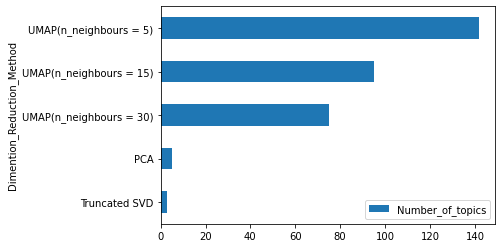

In [29]:
ax = df.plot.barh(x='Dimention_Reduction_Method', y='Number_of_topics', rot=0)